## Linear Regression Project
''Here is some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired someone on contract to help them figure it out! Let's get started and see how I helped them! (credit card numbers or emails are not real).'''

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
customers = pd.read_csv('Ecommerce Customers')

In [10]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
# Generate descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [17]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

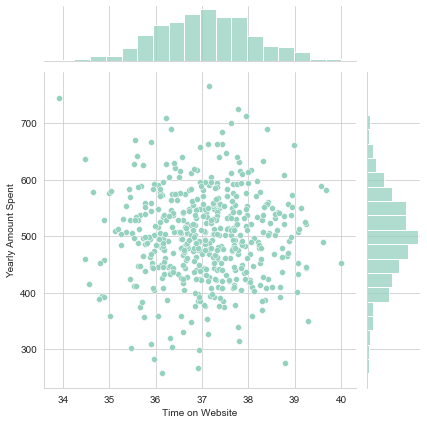

In [22]:
# created a jointplot to compare the Time on Website and Yearly Amount Spent columns.
sns.jointplot(x = customers['Time on Website'], y = customers['Yearly Amount Spent'], kind = 'scatter')

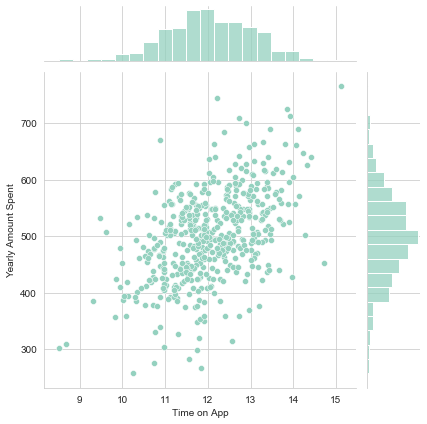

In [23]:
# created a jointplot to compare the Time on App and Yearly Amount Spent columns.
sns.jointplot(x = customers['Time on App'], y = customers['Yearly Amount Spent'], kind = 'scatter')

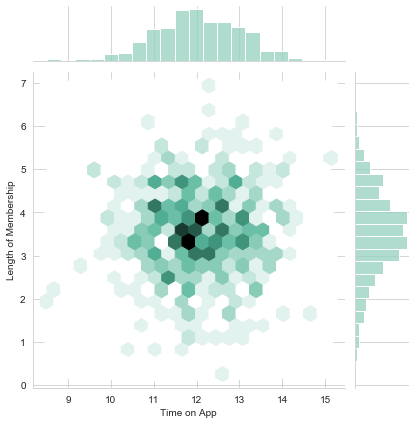

In [24]:
# created a 2D hex bin plot comparing Time on App and Length of Membership.
sns.jointplot(x = 'Time on App', y = 'Length of Membership', kind = 'hex', data = customers)

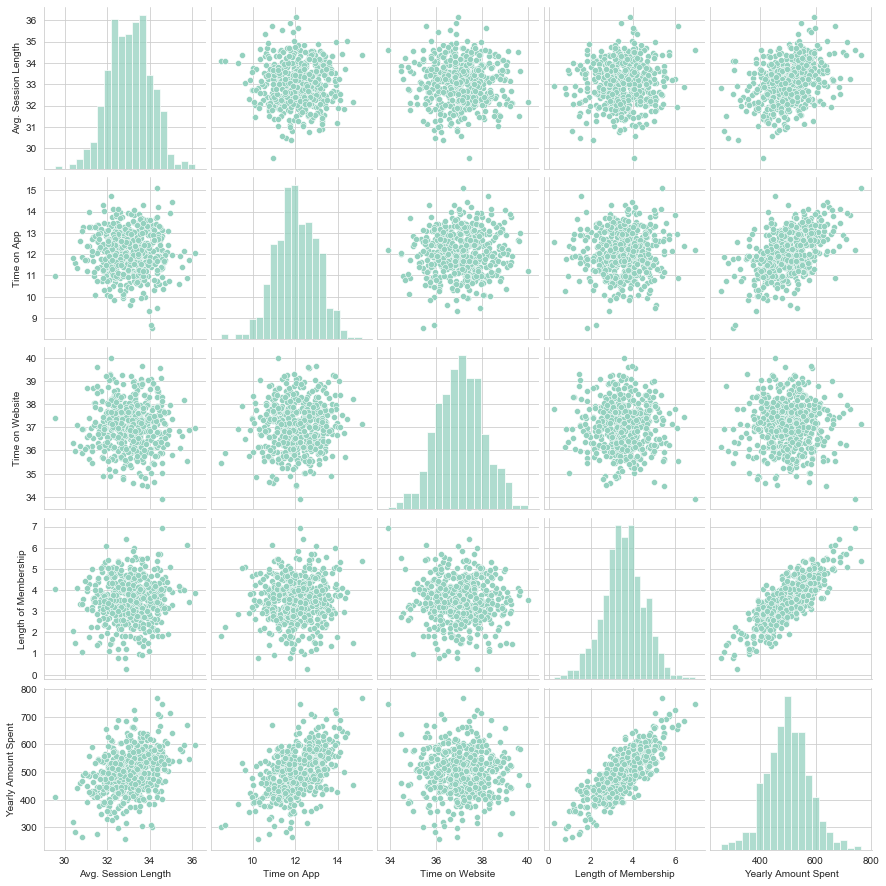

In [27]:
# Relation across entire dataset using pairplot.
sns.pairplot(customers)

In [28]:
# Based off above plot Length of Membership looks to be the most correlated feature with Yearly Amount Spent.  

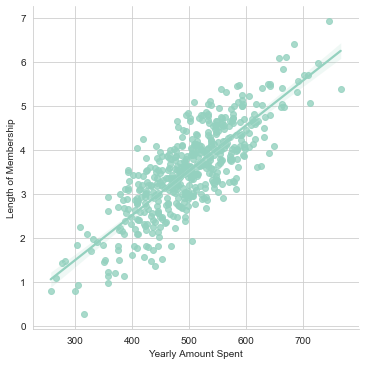

In [29]:
# Created a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.
sns.lmplot(x="Yearly Amount Spent", y="Length of Membership", data=customers)

## Training and Testing Data

Now, Let's split the data into training and testing sets.
** Set a variable X = numerical features of the customers and a variable y = "Yearly Amount Spent" column. **

In [30]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [34]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train my model on my training data!

** Import LinearRegression from sklearn.linear_model **

In [38]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [39]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [43]:
lm.fit(X_train,y_train)
# print(lm.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting Test Data
Now, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [48]:
prediction = lm.predict(X_test)
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Create a scatterplot of the real test values y_test versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

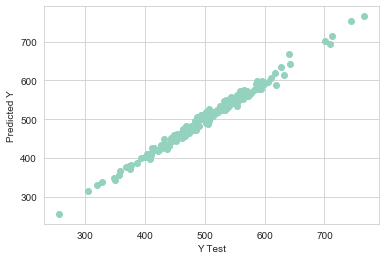

In [50]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [52]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,prediction)
MSE = metrics.mean_squared_error(y_test,prediction)
RMSE = np.sqrt(MSE)

print('Mean Absolute Error is: ', MAE)
print('Mean Squared Error is: ', MSE)
print('The Root Mean Squared Error is: ', RMSE)

Mean Absolute Error is:  7.228148653430835
Mean Squared Error is:  79.81305165097443
The Root Mean Squared Error is:  8.933815066978633


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

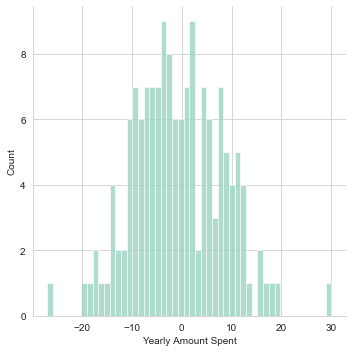

In [57]:
sns.displot((y_test-prediction),bins=50);

## Conclusion
I still wanted to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  
Let's see if we can interpret the coefficients at all to get an idea.

** Recreated the dataframe below. **

In [61]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, I would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion.